This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict stock price of a corporation (TELSA)


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ast import mod
import matplotlib.dates as mdates


In [ ]:
# Get the stock Quote
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/TSLA.csv'

In [ ]:
data = pd.read_csv(path)
start_date = '2015-01-01'
end_date = '2020-12-31'
data['Date'] = pd.to_datetime(data['Date'])
data_1 = data[(data['Date']>= start_date) & (data['Date']<= end_date)]
df = data_1[['Date','Adj Close']]
df = df.set_index('Date')
df.head()

,Adj Close
Date,
2015-01-02,43.862000
2015-01-05,42.018002
2015-01-06,42.256001
2015-01-07,42.189999
2015-01-08,42.124001


In [ ]:
# get number of rows and columns
df.shape

(1511, 1)

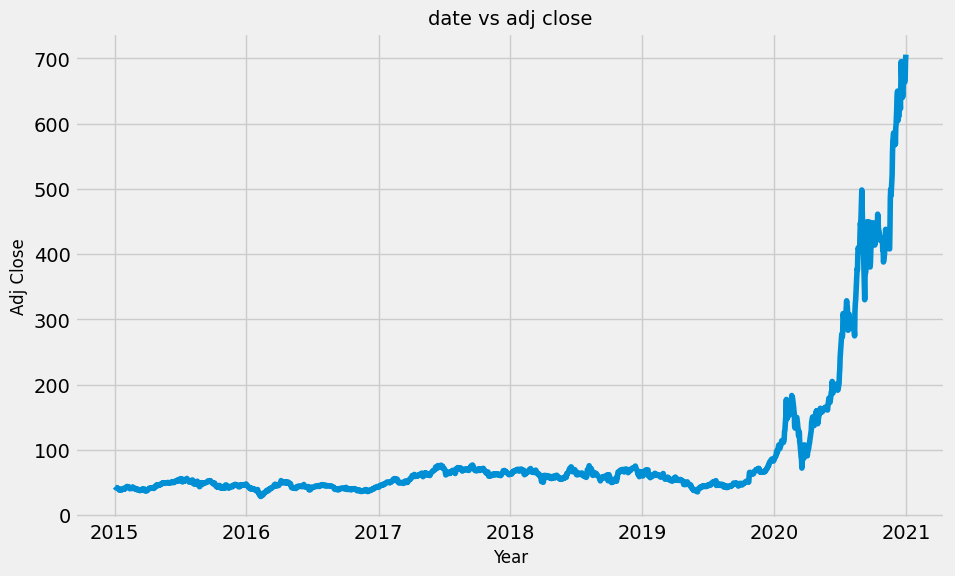

In [ ]:
# visualize the Adj Close
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'])
plt.title('date vs adj close', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.grid(True)
plt.show()

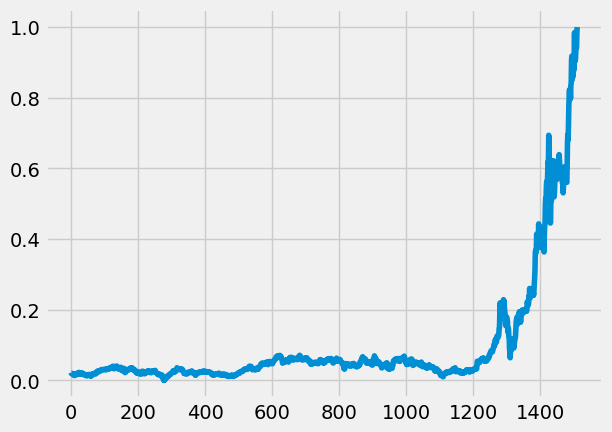

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
#data_scaled
plt.plot(data_scaled)
plt.show()

In [ ]:
#splilliting data
train_end_date = pd.to_datetime('2019-06-30')  # End of training data (first 4 years + 6 months)
test_start_date = pd.to_datetime('2019-07-01')
train_data = data_scaled[df.index < train_end_date]
test_data = data_scaled[df.index >= test_start_date]



In [ ]:
#convert an array of values into dataset matrix
def prepare_data(data, time_steps):
  dataX, dataY = [], []  # Initialize dataX and dataY as empty lists
  for i in range(len(data)-time_steps-1):
    a = data[i:(i+time_steps), 0]
    dataX.append(a)  # Append to dataX instead of x
    dataY.append(data[i+time_steps, 0])
  return np.array(dataX), np.array(dataY) # Return the numpy arrays

In [ ]:
# reshape into x=t and y=t+1
time_steps = 1
trainX, trainY = prepare_data(train_data, time_steps)
testX, testY = prepare_data(test_data, time_steps)


In [ ]:
# reshape input to 3D [samples,time,features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))


In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1,time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1128/1128 - 5s - 4ms/step - loss: 2.3850e-04
Epoch 2/50
1128/1128 - 2s - 2ms/step - loss: 1.0770e-04
Epoch 3/50
1128/1128 - 2s - 2ms/step - loss: 1.3209e-05
Epoch 4/50
1128/1128 - 2s - 2ms/step - loss: 6.4162e-06
Epoch 5/50
1128/1128 - 2s - 1ms/step - loss: 6.6808e-06
Epoch 6/50
1128/1128 - 2s - 1ms/step - loss: 7.2269e-06
Epoch 7/50
1128/1128 - 3s - 3ms/step - loss: 7.2621e-06
Epoch 8/50
1128/1128 - 2s - 2ms/step - loss: 7.3524e-06
Epoch 9/50
1128/1128 - 2s - 1ms/step - loss: 7.1049e-06
Epoch 10/50
1128/1128 - 3s - 2ms/step - loss: 7.0302e-06
Epoch 11/50
1128/1128 - 2s - 1ms/step - loss: 7.1510e-06
Epoch 12/50
1128/1128 - 3s - 2ms/step - loss: 7.1707e-06
Epoch 13/50
1128/1128 - 3s - 3ms/step - loss: 7.1320e-06
Epoch 14/50
1128/1128 - 2s - 2ms/step - loss: 7.1376e-06
Epoch 15/50
1128/1128 - 2s - 2ms/step - loss: 6.9264e-06
Epoch 16/50
1128/1128 - 2s - 2ms/step - loss: 7.0440e-06
Epoch 17/50
1128/1128 - 2s - 1ms/step - loss: 7.2724e-06
Epoch 18/50
1128/1128 - 2s - 1ms/step - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 4)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

In [ ]:
# invert predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
#plot
trainPredictplot = np.empty_like(data_scaled)
trainPredictplot[:,:] = np.nan
trainPredictplot[time_steps:len(trainPredict)+time_steps,:] = trainPredict
testPredictplot = np.empty_like(data_scaled)
testPredictplot[:,:] = np.nan
test_start_index = len(train_data)
testPredictplot[test_start_index : test_start_index + len(testPredict), :] = testPredict



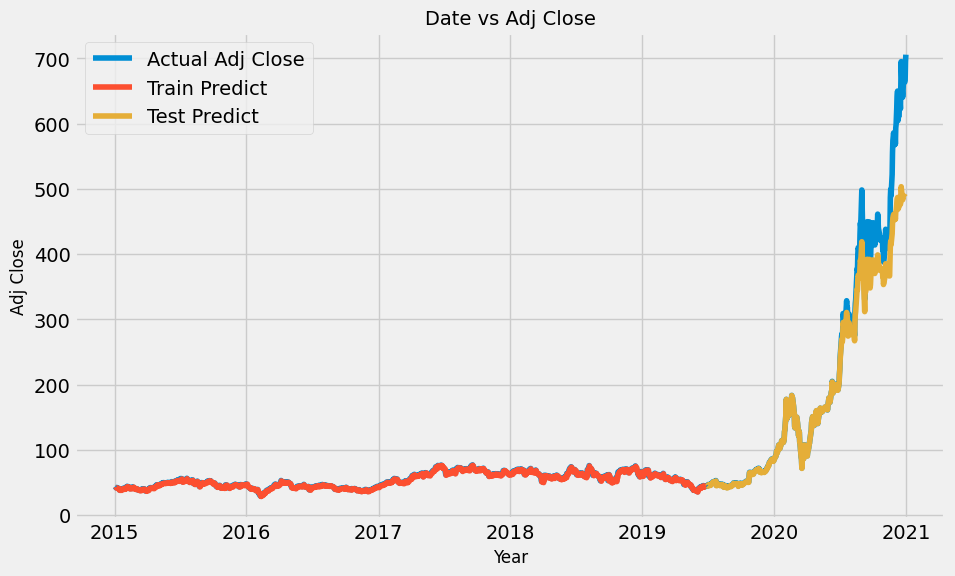

In [ ]:
dates = pd.date_range(start="2015-01-01", end="2020-12-31", freq="D") #dates for the entire dataset
plt.figure(figsize=(10, 6))

# Get the actual dates from your DataFrame's index
actual_dates = df.index

# Plot using the actual dates and corresponding scaled data
plt.plot(actual_dates, scaler.inverse_transform(data_scaled), label="Actual Adj Close")
plt.plot(actual_dates[time_steps:len(trainPredict) + time_steps], trainPredictplot[time_steps:len(trainPredict) + time_steps, 0], label="Train Predict")

# Plot test predictions using the correct date range
# Get the dates for the test data
test_dates = actual_dates[test_start_index:test_start_index + len(testPredict)]

# Plot the test predictions using test_dates
plt.plot(test_dates, testPredictplot[test_start_index:test_start_index + len(testPredict), 0], label="Test Predict")

plt.title("Date vs Adj Close", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Adj Close", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
test_predictions_df = pd.DataFrame({'Date': test_dates, 'Predicted Adj Close': testPredict[:,0]})
test_predictions_df.to_csv('/content/drive/MyDrive/test_predictions.csv', index=False)
